# ML Project  - Learning about Donations 

This project was made in the context of the Machine Learning course from the Faculty of Science from Lisbon University. The [dataset](https://rdrr.io/cran/regclass/man/DONOR.html) concerns donations made to a national veterans organization. Even though we also did unsupervised learning, I focused mainly on supervised learning so that's what will be shown here.

The task is split in three parts:

* Predict if an individual will donate or not (binary classification)
* From the subset of donors, predict the donation type (multiclass classification), based on donation amount (DA):
    * `A` - DA >= 50
    * `B` - 20 <= DA < 50 
    * `C` - 13 <= DA < 20
    * `D` - 10 <= DA < 13
    * `E` - DA < 10
* For each Socioeconomic Group (SES), repeat the two previous tasks.

## Dataset

The dataset is in the **Donors_dataset.csv** anex to this project. Let's take a look at the description of each data field.

### Data Fields

* **CARD_PROM_12** - number of card promotions sent to the individual by the charitable organization in the past 12 months
* **CLUSTER_CODE** - one of 54 possible cluster codes, which are unique in terms of socioeconomic status, urbanicity, ethnicity, and other demographic characteristics
* **CONTROL_NUMBER** - unique identifier of each individual
* **DONOR_AGE** - age as of last year's mail solicitation
* **DONOR_GENDER** - actual or inferred gender
* **FILE_AVG_GIFT** - this variable is identical to LIFETIME_AVG_GIFT_AMT
* **FILE_CARD_GIFT** - lifetime average donation (in \\$) from the individual in response to all card solicitations from the charitable organization
* **FREQUENCY_STATUS_97NK** - based on the period of recency (determined by RECENCY_STATUS_96NK), which is the past 12 months for all groups except L and E. L and E are 13–24 months ago and 25–36 months ago, respectively: 1 if one donation in this period, 2 if two donations in this period, 3 if three donations in this period, and 4 if four or more donations in this period.
* **HOME_OWNER** - H if the individual is a homeowner, U if this information is unknown
* **INCOME_GROUP** - one of 7 possible income level groups based on a number of demographic characteristics
* **IN_HOUSE** - 1 if the individual has ever donated to the charitable organization's In House program, 0 if not
* **LAST_GIFT_AMT** - amount of the most recent donation from the individual to the charitable organization
* **LIFETIME_AVG_GIFT_AMT** - lifetime average donation (in \\$) from the individual to the charitable organization
* **LIFETIME_CARD_PROM** - total number of card promotions sent to the individual by the charitable organization
* **LIFETIME_GIFT_AMOUNT** - total lifetime donation amount (in \\$) from the individual to the charitable organization
* **LIFETIME_GIFT_COUNT** - total number of donations from the individual to the charitable organization
* **LIFETIME_GIFT_RANGE** - maximum donation amount from the individual minus minimum donation amount from the individual
* **LIFETIME_MAX_GIFT_AMT** - maximum donation amount (in \\$) from the individual to the charitable organization
* **LIFETIME_MIN_GIFT_AMT** - minimum donation amount (in \\$) from the individual to the charitable organization
* **LIFETIME_PROM** - total number of promotions sent to the individual by the charitable organization
* **MEDIAN_HOME_VALUE** - median home value (in 100\\$) as determined by other input variables
* **MEDIAN_HOUSEHOLD_INCOME** - median household income (in 100\\$) as determined by other input variables
* **MONTHS_SINCE_FIRST_GIFT** - number of months since the first donation from the individual to the charitable organization
* **MONTHS_SINCE_LAST_GIFT** - number of months since the most recent donation from the individual to the charitable organization
* **MONTHS_SINCE_LAST_PROM_RESP** - number of months since the individual has responded to a promotion by the charitable organization
* **MONTHS_SINCE_ORIGIN** - number of months that the individual has been in the charitable organization's database
* **MOR_HIT_RATE** - total number of known times the donor has responded to a mailed solicitation from a group other than the charitable organization
* **NUMBER_PROM_12** - number of promotions (card or other) sent to the individual by the charitable organization in the past 12 months
* **OVERLAY_SOURCE** - the data source against which the individual was matched: M if Metromail, P if Polk, B if both
* **PCT_ATTRIBUTE1** - percent of residents in the neighborhood in which the individual lives that are males and active military
* **PCT_ATTRIBUTE2** - percent of residents in the neighborhood in which the individual lives that are males and veterans
* **PCT_ATTRIBUTE3** - percent of residents in the neighborhood in which the individual lives that are Vietnam veterans
* **PCT_ATTRIBUTE4** - percent of residents in the neighborhood in which the individual lives that are WWII veterans
* **PCT_OWNER_OCCUPIED** - percent of owner-occupied housing in the neighborhood in which the individual lives
* **PEP_STAR** - 1 if individual has ever achieved STAR donor status, 0 if not
* **PER_CAPITA_INCOME** - per capita income (in \\$) of the neighborhood in which the individual lives
* **PUBLISHED_PHONE** - 1 if the individual's telephone number is published, 0 if not
* **RECENCY_STATUS_96NK** - recency status as of two years ago: A if active donor, S if star donor, N if new donor, E if inactive donor, F if first time donor, L if lapsing donor
* **RECENT_AVG_CARD_GIFT_AMT** - average donation from the individual in response to a card solicitation from the charitable organization since four years ago
* **RECENT_AVG_GIFT_AMT** - average donation (in \\$) from the individual to the charitable organization since four years ago
* **RECENT_CARD_RESPONSE_COUNT** - number of times the individual has responded to a card solicitation from the charitable organization since four years ago
* **RECENT_CARD_RESPONSE_PROP** - proportion of responses to the individual to the number of card solicitations from the charitable organization since four years ago
* **RECENT_RESPONSE_COUNT** - number of times the individual has responded to a promotion (card or other) from the charitable organization since four years ago
* **RECENT_RESPONSE_PROP** - proportion of responses to the individual to the number of (card or other) solicitations from the charitable organization since four years ago
* **RECENT_STAR_STATUS** - 1 if individual has achieved star donor status since four years ago, 0 if not
* **SES** - one of 5 possible socioeconomic codes classifying the neighborhood in which the individual lives
* **TARGET_B** - 1 if individual donated in response to last year's 97NK mail solicitation from the charitable organization, 0 if individual did not
* **TARGET_D** - amount of donation (in \\$) from the individual in response to last year's 97NK mail solicitation from the charitable organization
* **URBANICITY** - classification of the neighborhood in which the individual lives: U if urban, C if city, S if suburban, T if town, R if rural, ? if missing
* **WEALTH_RATING** - one of 10 possible wealth rating groups based on a number of demographic characteristics



## Exploratory Data Analysis

The dataset is quite noisy and the project put a lot of emphasis on EDA, so a separate notebook named EDA was done where in depth analysis and preprocessing steps are explained.

## Loading Data

The necessary libraries and options are set

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%pprint #disables pretty printing to see printed lists horizontally
%matplotlib inline

pd.set_option("display.precision",2)
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

Pretty printing has been turned OFF


When playing around with preprocessing, it was usefull to define a function that resets the dataframe to its original state.

In [2]:
def df_reset():
    global df
    #load data
    raw_df = pd.read_csv("Donors_dataset.csv")
    #define the variable with the data and drop redundant variables (see description)
    df = raw_df.drop(["FILE_AVG_GIFT","CONTROL_NUMBER"],axis = 1).copy()
    #organize variables alphabetically
    ordered_names = list(df.columns)
    ordered_names.sort()
    df = df[ordered_names]
    #change variable names to lowercase
    df.columns = df.columns.str.lower()
    #reset the index
    df.reset_index(inplace=True)
    

In [3]:
df_reset()

## Exploratory Data Analysis and Data Preprocessing.

The dataset is quite noisy and the project put a lot of emphasis on EDA, so a separate notebook named EDA was done where in depth analysis and preprocessing steps are explained. Here we mostly just apply what we conclude in that notebook.

If we had more time, the preprocessing could be done more elegantly by building a preprocessing class with the severall preprcessing steps as methods. Instead we decided to create variables that if set to true perform the associated stage.

The preprocessing for continuous variables should go in this order:
* outlier treatment
* imputation of missing values
* binning
* one-hot encoding/Label encoding
* scaling

Here variables are created that control the processing stages. Adjust this to False/True as you wish

In [4]:
#remove outliers
PROCESS_OUTLIERS = True

#impute data based on severall methods and data type conversion
GAP_FILLING      = True

#remove rows that are too noisy
REMOVE_ERRORS    = True

#bin continuous variables
PROCCESS_BINNING = True

#control the type of binning
uniform_binning  = False

#perform one hot encoding
ONE_HOT_ENCODING = True

#perform feature scalling
PROCESS_SCALING  = True

each of these steps is detailed bellow

#### Outlier treatment

Let's start out by removing the outliers. For this we create a function that decides upon a threshold using the z score (3 std deviations from the mean) and sets the outliers to that value.

In [5]:
def rm_outliers(df,column_list):
    for column in column_list:
        z_lower_threshold = df[column].mean()-3*df[column].std()
        z_higher_threshold = df[column].mean()+3*df[column].std()

        df.loc[df[column]>z_higher_threshold,column] = z_higher_threshold
        df.loc[df[column]<z_lower_threshold,column] = z_lower_threshold
    
    return df

In [6]:
#helper_function to append a column to all the data processing lists
def append(column):
    columns_to_bin.append(column)
    columns_norm.append(column)
    columns_outliers.append(column)

After some exploration of the data it was decided that all of the following columns are good candidates for both binning and outlier treatment.

In [7]:
columns_outlier_bin =(['donor_age', 'file_card_gift', 'last_gift_amt', 'lifetime_avg_gift_amt', 'lifetime_card_prom', 
                  'lifetime_gift_amount', 'lifetime_gift_count', 'lifetime_gift_range', 'lifetime_max_gift_amt', 
                  'lifetime_min_gift_amt', 'lifetime_prom', 'median_home_value', 'median_household_income',
                  'months_since_first_gift', 'months_since_last_gift', 'months_since_last_prom_resp', 'months_since_origin', 
                  'mor_hit_rate', 'number_prom_12', 'pct_attribute1', 'pct_attribute2', 'pct_attribute3', 'pct_attribute3',
                  'pct_owner_occupied', 'per_capita_income', 'recent_avg_card_gift_amt', 'recent_avg_card_gift_amt',
                  'recent_card_response_prop', 'recent_response_count', 'recent_response_prop'])

In [8]:
if PROCESS_OUTLIERS:
    df = rm_outliers(df,columns_outlier_bin)

#### Imputation of missing values and type conversion of variables

In [9]:
from sklearn.linear_model import LinearRegression
def gap_fill(df):
    #Cluster code
    df.loc[(df.cluster_code == '.'),'cluster_code']='0'
    df.cluster_code = df.cluster_code.astype('int64')
    
    #Donor Age
    impute_table = df[['months_since_origin','donor_age']][df.donor_age.notnull()].groupby(['months_since_origin']).mean()
    nan_unique_vals = []
    for i in df.months_since_origin[df.donor_age.isnull()].unique():
        if i not in impute_table.index:
            nan_unique_vals.append(i)
    from sklearn.linear_model import LinearRegression
    df.loc[df.donor_age <=18,'donor_age']=np.NaN
    X = df.months_since_origin[df.donor_age.notnull()].values.reshape(-1,1)
    y = df.donor_age[df.donor_age.notnull()].values.reshape(-1,1)
    impute_fit=LinearRegression()
    impute_fit = impute_fit.fit(X,y)
    for nan_age_index in df.donor_age[df.donor_age.isnull()].index:
        if df.months_since_origin.iloc[nan_age_index] in nan_unique_vals:
            #impute with model in case there is no base reference to impute
            df.at[nan_age_index,'donor_age'] = impute_fit.predict(df.months_since_origin.loc[nan_age_index].reshape(1,-1)).flatten()
        else:
            #impute according to impute_table otherwise
            df.at[nan_age_index,'donor_age'] = impute_table.loc[df.months_since_origin.iloc[nan_age_index]]

        
    #File Card Gift
    df.file_card_gift = df.file_card_gift.astype("float64")
    
    #Income Group
    df.income_group = df.income_group.fillna(value=0.)
    df.income_group = df.income_group.astype('int64')
    
    #Median Home Value
    df.loc[df.median_home_value == 0,'median_home_value']=np.NaN
    df['median_home_value'] = df.groupby(['ses','urbanicity'], sort=False)['median_home_value'].apply(lambda x: x.fillna(x.mean()))

    #Median Household Income
    df.loc[df.median_household_income == 0,'median_household_income']=np.NaN
    df['median_household_income'] = df.groupby(['ses','urbanicity'], sort=False)['median_household_income'].apply(lambda x: x.fillna(x.mean()))
    
    #Income Group
    df['median_household_bin'] = pd.qcut(df.median_household_income,7,labels=False)
    df['income_group'] = df.groupby(['median_household_bin'], sort=False)['income_group'].apply(lambda x: x.fillna(x.mean())).copy()
    df['income_group'] = df['income_group'].round()
    df.drop('median_household_bin',axis=1,inplace=True)
    df['income_group'] = df['income_group'].astype('str')
    
    #Months Since Last Prom Resp
    df['months_since_last_prom_resp'].values[df.months_since_last_prom_resp<1] = 0
    df.months_since_last_prom_resp.fillna(value=df.months_since_last_prom_resp.mean(),inplace = True)
    df.months_since_last_prom_resp = df.months_since_last_prom_resp.astype('int64')
    
    #Per Capita Income
    df.loc[df.per_capita_income == 0,'per_capita_income']=np.NaN
    df['per_capita_income'] = df.groupby(['ses','urbanicity'], sort=False)['per_capita_income'].apply(lambda x: x.fillna(x.mean()))
    
    #Recent Star Status
    df['recent_star_status'].values[df.recent_star_status > 1] = 1

    #Wealth Rating
    df['median_household_bin'] = pd.qcut(df.median_household_income,9,labels=False)
    df['wealth_rating'] = df.groupby(['median_household_bin'], sort=False)['wealth_rating'].apply(lambda x: x.fillna(x.mean())).copy()
    df['wealth_rating'] = df['wealth_rating'].round()
    df.drop('median_household_bin',axis=1,inplace=True)
    
    
    return df

In [10]:
if GAP_FILLING:
    df= gap_fill(df)

Now the errors are removed and the target variable is defined

In [11]:
if REMOVE_ERRORS:
    df = df[df.urbanicity !='?'].copy()
    df.reset_index(inplace=True,drop=True)

In [12]:
target = df.target_b.copy()
target_type = df.target_d.copy()
df.drop(["target_d","target_b"],axis=1,inplace=True)

#### Binning

The variables to bin are the following:

In [13]:
columns_outlier_bin

['donor_age', 'file_card_gift', 'last_gift_amt', 'lifetime_avg_gift_amt', 'lifetime_card_prom', 'lifetime_gift_amount', 'lifetime_gift_count', 'lifetime_gift_range', 'lifetime_max_gift_amt', 'lifetime_min_gift_amt', 'lifetime_prom', 'median_home_value', 'median_household_income', 'months_since_first_gift', 'months_since_last_gift', 'months_since_last_prom_resp', 'months_since_origin', 'mor_hit_rate', 'number_prom_12', 'pct_attribute1', 'pct_attribute2', 'pct_attribute3', 'pct_attribute3', 'pct_owner_occupied', 'per_capita_income', 'recent_avg_card_gift_amt', 'recent_avg_card_gift_amt', 'recent_card_response_prop', 'recent_response_count', 'recent_response_prop']

In [14]:
def Bin_all(df, uniform_binning,nbins_uniform = 10, nbins_q=8):
    if uniform_binning:
        for column in columns_outlier_bin:
            df[column] = pd.cut(df[column],nbins_uniform,labels=False)
    else:
        for column in columns_outlier_bin:
            df[column] = pd.qcut(df[column],nbins_q,labels=False, duplicates = 'drop')
    
    return df

In [15]:
if PROCCESS_BINNING:
    df = Bin_all(df, uniform_binning)

#### One-hot encoding/Label encoding

In [16]:
def one_hot_encode(df):
    #LABEL ENCODING - even though one-hot encoding yields best results it is usefull for exploring correlations so I'm keeping it here
    #df.recency_status_96nk = df.recency_status_96nk.map( {'E':0,'L':1,'F':2, 'N':3, 'A':4, 'S':5} ).astype('int64')
    #df.frequency_status_97nk = df.frequency_status_97nk.map( {4:'A',3:'B',2:'C', 1:'D'} )
    df['donor_gender'].values[df.donor_gender == 'A'] = 'F'
    df.donor_gender = df.donor_gender.map( {'F': 1, 'M': 0,'U':3} ).astype('int64')
    df.home_owner = df.home_owner.map( {'H': 1, 'U': 0} ).astype('int64')
    #df.overlay_source = df.overlay_source.map({'P':1, 'B':2, 'N':3, 'M':4})
    #df.urbanicity = df.urbanicity.map({'U':1,'C':2,'S':3,'T':4,'R':5,'?':6})
    df['ses'].values[df.ses == '?'] = 0
    df.ses = df.ses.astype('int64')

    #ONE-HOT ENCODING
    df = pd.get_dummies(df)

    return df,target

In [17]:
if ONE_HOT_ENCODING:
    df,target = one_hot_encode(df)

#### Scaling/normalization

These are the variables that resemble normal distribution

In [18]:
columns_norm = (['donor_age', 'file_card_gift', 'donor_age', 'last_gift_amt', 'lifetime_avg_gift_amt',
                'lifetime_card_prom', 'lifetime_gift_amount', 'lifetime_gift_count', 'lifetime_gift_range',
                'lifetime_max_gift_amt', 'lifetime_min_gift_amt', 'lifetime_prom', 'median_home_value',
                'median_household_income', 'median_home_value', 'median_household_income', 'months_since_first_gift',
                'months_since_last_prom_resp', 'number_prom_12', 'pct_attribute2', 'pct_attribute3', 'pct_attribute3',
                'pct_owner_occupied', 'per_capita_income', 'recent_avg_card_gift_amt', 'recent_avg_card_gift_amt', 
                'recent_card_response_prop', 'recent_response_count', 'recent_response_prop'])

These variables will go through a Stadard Scaler while the rest will be MinMax Scaled.

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [20]:
def process_scaling(df,columns_norm):
    normalize = MinMaxScaler()
    scale = StandardScaler()
    
    # Change everything to floats. Otherwise, it might not be possible to normalize...
    df = df.astype(float)
    
    #normalization
    if (len(columns_norm) != 0):
        print("Normalizing. Number of columns normalized: ",len(columns_norm))
        df[columns_norm] = normalize.fit_transform(df[columns_norm])

    columns_to_be_scaled =list(set(df.columns) -set(columns_norm))
    
    #scaling
    if (len(columns_to_be_scaled) != 0):
        print("Scaling. Number of columns scaled: ",len(columns_to_be_scaled))
        df[columns_to_be_scaled] = scale.fit_transform(df[columns_to_be_scaled])

    return df

In [21]:
if PROCESS_SCALING:
    df = process_scaling(df,columns_norm)

Normalizing. Number of columns normalized:  29
Scaling. Number of columns scaled:  42


## Learning Classifiers

In this section the models will be fitted and the reasoning behind the decisions about how to do this will be explained. Invariably, many of these decisions are made following the "what yields best results" criteria.

The steps that were made for this section in generall follow this structure:
* Rebalance data.
* Fit all models
* Get results and draw confusion matrices
* Compare results
* Fine tune models
* Perform feature selection
* Fine tune again if needed

### 1.2.1 Donor Classification

We were asked to test one models from each of the following categories: Tree models, Linear models, Distance-based models, and Probabilistic models. After fiddling with the models that were presented in class and having an idea about which ones would yield the best performances, the chosen algorithms were Gaussian Naive-Bayes, K-Neighbors Classifier, the Support Vector Classifier and the Decision Tree Classifier.

In [22]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, make_scorer 
from sklearn.model_selection import train_test_split
#For rebalancing
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.utils import resample


#library to time models 
import time

The general way the classifiers will be treated is that a list named MLA (Machine Learning Algorithms) that contains the models to fited will be passed onto a function that will do the rebalancing, fit the model and present the results. 
In the next cell the models are defined. Note that the idea here is to not fine-tune the models. SVC difers from the rest because the number of iterations need to be increased in order for it to converge.

In [23]:
MLA = [  
     #Naive Bayes
     naive_bayes.GaussianNB(),
    
     #Nearest Neighbor
     neighbors.KNeighborsClassifier(),
    
     #SVM
     svm.SVC(max_iter=20000),
    
     #Trees    
     tree.DecisionTreeClassifier()
    ]

The Fit_donor function defined bellow does severall things:
* rebalances the data
* fits and does cross-validation for all the models
* draws confusion matrices
* returns a table with the means from cross-validation for accuracy, precision,recall and f1-score

To explain the first step better, we note that this is an imbalanced dataset:

In [24]:
target.value_counts()

0    14215
1     4703
Name: target_b, dtype: int64

Resampling should be done in order to improve the performance of the models. There are severall options on how to do this:
* RandomOverSampler - this randomly duplicates a point from the minority class until balancing is achieved
* SMOTE - uses k nearest neighbors to create synthetic samples of the the minority class
* None - no balancing is performed

In order to implement this, a pipeline was created inside the Fit_donor function defined bellow that does the rebalancing at training time. This allows for doing cross validation and rebalancing, which would otherwise be a challange because the test set cannot be rebalanced. Also since this dataset is imbalanced, the selected cross-validation method was StratifiedKFold. This guaratees that the cross validation splits are also balanced (important for the case where no balancing is done).
The default option for rebalancing is Random Over Sampler since after testing (results bellow), it was observed that it yields the best results and it runs faster.

In [25]:
def Fit_donor(df, target, MLA, balancing = 'RandomOverSampler', draw_confusion_matrix = True):
    #df - X  
    #target - Y
    #MLA - List of Models to train
    #balancing - select balancing strategy ('RandomOverSampler','SMOTE' or 'None')
    #draw_confusion_matrix - show confusion matrix
    
        
    
    #create subplots for confusion matrix
    if draw_confusion_matrix:
        fig, ax = plt.subplots(1,len(MLA),figsize=(20,5))
    
    
    #split dataset in cross-validation folds
    cv_split = model_selection.StratifiedKFold(n_splits = 10, shuffle=True, random_state = 0 ) 
    #create table to compare MLA metrics
    MLA_columns = ['Model Name', 'Parameters','Mean Accuracy', 'Mean F1','Mean Precision','Mean Recall','Fit Time']
    MLA_compare = pd.DataFrame(columns = MLA_columns)



    #loop through MLA and save performance to table
    row_index = 0
    for alg in MLA:
        #set name and parameters
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index, 'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
        
        #Rebalancing
        if balancing == 'RandomOverSampler':
            model = Pipeline([
            ('RandomOverSampler', RandomOverSampler(sampling_strategy=1.0,random_state=0)),
            ('classification', alg)
            ])
        elif balancing == 'SMOTE':
            model = Pipeline([
            ('smote', SMOTE(n_jobs=-1,random_state=0,sampling_strategy=1.0 , k_neighbors=15)),
            ('classification', alg)
            ])
        else:
            model = Pipeline([
            ('classification', alg)
            ])

        #score model with cross validation: 
        cv_results = (model_selection.cross_validate(model, df, target, cv  = cv_split, 
                                                    scoring = ['f1','accuracy','recall','precision'], n_jobs =-1))
        
        #save performance metrics in table MLA_compare
        MLA_compare.loc[row_index, 'Fit Time'] = cv_results['fit_time'].mean()
        MLA_compare.loc[row_index, 'Mean Accuracy'] = cv_results['test_accuracy'].mean()
        MLA_compare.loc[row_index, 'Mean F1'] = cv_results['test_f1'].mean()  
        MLA_compare.loc[row_index, 'Mean Recall'] = cv_results['test_recall'].mean() 
        MLA_compare.loc[row_index, 'Mean Precision'] = cv_results['test_precision'].mean() 

        
        # a seperate fit is made in order to build the confusion matrix
        x_train, x_test, y_train, y_test = train_test_split(df,target,stratify=target)
        if balancing == 'SMOTE':
            x_train ,y_train =SMOTE(n_jobs=-1,random_state=0,sampling_strategy=1.0 , k_neighbors=15).fit_sample(x_train,y_train)
        if balancing == 'RandomOverSampler':
            x_train ,y_train =RandomOverSampler(sampling_strategy=1.0,random_state=0).fit_sample(x_train,y_train)
        alg.fit(x_train,y_train)
        preds = alg.predict(x_test)
        precision, recall, fscore, _ = metrics.precision_recall_fscore_support(y_test,preds,average='binary')
        
        #confusion matrix setting
        if draw_confusion_matrix:
            cf_matrix = metrics.confusion_matrix(y_test,preds)
            

            group_names = ['True Neg','False Pos','False Neg','True Pos']
            group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
            group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
            #show percentages
            #labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
            #don't show percentages
            labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
            labels = np.asarray(labels).reshape(2,2)

            accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,fscore)
            
            #transform confusion matrix into fraction of actuals
            cf_matrix = cf_matrix.astype(float)
            for i in range(cf_matrix.shape[0]):
                cf_matrix[i] = cf_matrix[i]/ cf_matrix[i].sum()
                
                
            #confusion matrix plot
            sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax[row_index],square=True,cbar_kws={'label': 'fraction of actuals'})
            ax[row_index].set_title(MLA_name)
            ax[row_index].set_xlabel(stats_text)
        
        row_index+=1

    #sort results by f1 score, the prefered performance metric
    MLA_compare.sort_values(by = ['Mean F1'], ascending = False, inplace = True)
    return MLA_compare[MLA_columns]

A note about the confusion matrix: even though it might seem a bit confusing, the colors of the representation bellow don't correspond to the numbers shown in the same square. In order to have a better idea of what is happening to each individual class, each row of the confusion matrix was divided by its sum. This means the colors represent the fraction of "actuals" rather than the fraction of the whole dataset. The numbers were kept because having them adds to the interpretation of the graph

The results without any balancing are presented here:

C:\Users\Aldina\anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


,Model Name,Parameters,Mean Accuracy,Mean F1,Mean Precision,Mean Recall,Fit Time
0,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.62,0.39,0.33,0.49,0.08
3,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.63,0.29,0.28,0.3,0.73
1,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.71,0.17,0.3,0.12,1.5
2,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.75,0.0088,0.57,0.0045,68


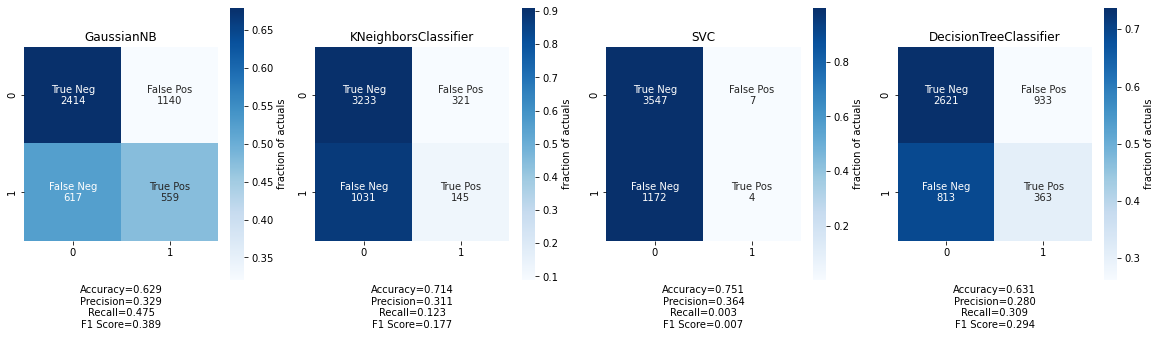

In [26]:
Fit_donor(df,target, MLA,balancing='None')

The results with Random over sampling:

,Model Name,Parameters,Mean Accuracy,Mean F1,Mean Precision,Mean Recall,Fit Time
0,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.58,0.41,0.31,0.58,0.25
2,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.62,0.38,0.32,0.47,1.8e+02
1,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.55,0.34,0.26,0.46,3
3,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.64,0.28,0.28,0.29,1.3


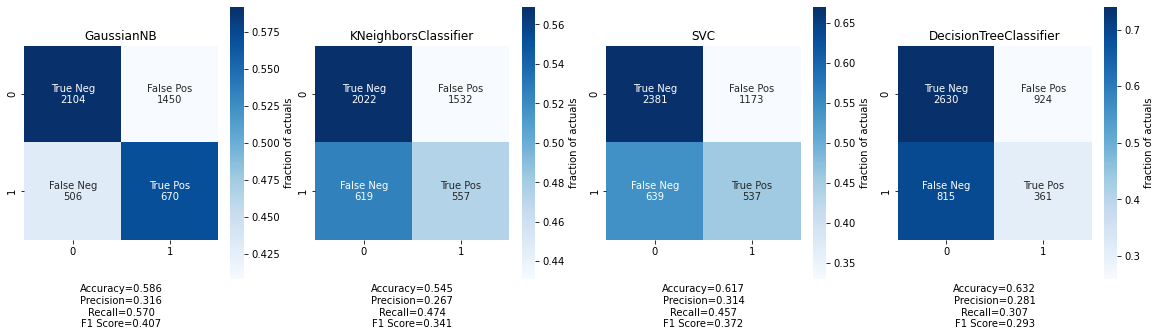

In [27]:
Fit_donor(df,target, MLA)

First of all it should be noted that none of the models performs particularly well on all the metrics, with most results actually being quite poor. Since we are mainly interested in guessing who is donor and this is an imbalanced dataset, the f1 score probably (depends on what exactly is the goal of the prediction) provides the best metric to evaluate how good the models are. Based on that criteria, the Gaussian Naive-Bayes outperformed all other models. Actually the only model that has a higher performance metric than the Nave-Bayes is the Decision Tree with a slightly higher accuracy, however looking at the confusion matrix it's clear that the Decision Tree identifies non donors well, but falls short on identifying actual donors, which is not the desired behaviour.

The effects of balancing should also be discussed. As it can be observed by comparing the previous results, balancing increased the performance of the KNN and SVC models drastically, while boosting the GaussianNB by 2% and decreasing the performance of the Decision Trees. Decision Trees and Naive-Bayes in general don't perform badly with imbalanced models, so these results makes sense.

The results with SMOTE are not shown here but they're very similar to the Random Over Sampler.

#### Fine Tunning the models

The models can be fine tuned to increase performance. With this in mind, the GridSearch_all function was made to optimize these models

In [28]:
MLA_grid_search = [       
    #Navies Bayes
    naive_bayes.GaussianNB(), #this model is here just for easy comparison, since it can't be fine-tuned
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(), 
    ]

In [29]:
def GridSearch_all(df, target, MLA , score = 'f1', balancing='RandomOverSampler'):
    #df - X  
    #target - Y
    #MLA - List of Models to train
    #score - criteria used to choose the best set of hyperparameters

    grid_seed = [0]
    
    
    #grid_param contains all the hyperparameters to finetune
    #IMPORTANT NOTE: the order of the parameters in grid_param has to match the order of the models in MLA
    grid_param = [

                 #GaussianNB - 
                 [{}],
        
                 

                 [{
                 #KNeighborsClassifier 
                 'clf__n_neighbors': [5,10,20,50],
                 'clf__weights': ['uniform', 'distance'],
                 'clf__algorithm': ['auto', 'ball_tree', 'kd_tree'],
                 'clf__metric': ['minkowski', 'manhattan']
                 }],




                 [{
                 #SVC 
                 'clf__kernel': ['rbf'],
                 'clf__C': [1,10,100], #default=1.0
                 'clf__gamma':[1,0.5,0.1], #edfault: auto
                 'clf__random_state': grid_seed
                  }],
        
        
                
                  [
                  #DecisionTreeClassifier
                  {'clf__criterion': ['gini', 'entropy'], 
                  'clf__splitter': ['best'], 
                  'clf__max_depth': [2,4,6,None],
                  'clf__min_samples_split': [2,5,10,.03],
                  'clf__min_samples_leaf': [1,5,10,.03], 
                  'clf__max_features': [None, 'auto'],
                  'clf__random_state': grid_seed 
                 }]
                    
            ]
    
    #Creation of Dataframe to compare models
    MLA_columns = ['Model Name', 'Best Parameters','Mean Test Score','Fit Time']
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    
    #helper counter
    row_index = 0
    
    #cross-validation
    cv_split = model_selection.StratifiedKFold(n_splits = 10, shuffle=True, random_state = 0 ) 
    
    #start timer
    start_total = time.perf_counter()
    
    
    #body of Gridsearch is in this loop
    print('Current Model:')
    for alg, param in zip (MLA, grid_param): 
        MLA_name = alg.__class__.__name__
        print(MLA_name)
        
        #Rebalancing
        if balancing == 'RandomOverSampler':
            model = Pipeline([
            ('RandomOverSampler', RandomOverSampler(sampling_strategy=1.0,random_state=0)),
            ('clf', alg)
            ])
        elif balancing == 'SMOTE':
            model = Pipeline([
            ('smote', SMOTE(n_jobs=-1,random_state=0,sampling_strategy=1.0 , k_neighbors=15)),
            ('clf', alg)
            ])
        else:
            model = Pipeline([
            ('clf', alg)
            ])


        #start timer
        start = time.perf_counter()
        
        #actual GridSearchCV
        best_search = model_selection.GridSearchCV(estimator = model, param_grid = param[0], cv = cv_split, scoring = score,n_jobs=-1)
        best_search.fit(df, target)
        run = time.perf_counter() - start
        print('Time to optimize:',run)
        
        
        best_param = best_search.best_params_
        model.set_params(**best_param) 

        
        MLA_compare.loc[row_index, 'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Best Parameters'] = str(best_param)
        MLA_compare.loc[row_index, 'Fit Time'] = best_search.cv_results_['mean_fit_time'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Mean Test Score'] = best_search.cv_results_['mean_test_score'][best_search.best_index_]
        row_index+=1



    run_total = time.perf_counter() - start_total


    print('Total optimization time was {:.2f} minutes.'.format(run_total/60))
    MLA_compare.sort_values(by = ['Mean Test Score'], ascending = False, inplace = True)
    return MLA_compare

In [30]:
#Very computationaly heavy to run
#results = GridSearch_all(df, target, MLA_grid_search )
#results

Unfortunatly the results from GridSearch were accidentaly cleared and it is very computationally heavy, but performing GridSearch did **not** improve the results and the Naive-Bayes classifier still outperformed all the others with 0.41 f1-score.

### Classification Donation Type

In [31]:
#reset df and target dataframes
df_reset()

In the case of Donation Type prediction, the outliers are probably dealt better if not removed since, for example, a very high donation amount can correlate with an abnormaly high lifetime_gift_amount. In fact experimenting with the preprocessing variables led to the conclusion that the following combination of preprocessing operations yields the best results.

In [32]:
PROCESS_OUTLIERS = False
GAP_FILLING      = True
REMOVE_ERRORS    = True
PROCCESS_BINNING = True
uniform_binning  = False
ONE_HOT_ENCODING = True
PROCESS_SCALING  = True

now the preprocessing operations per se

In [33]:
if PROCESS_OUTLIERS:
    df = rm_outliers(df,columns_outlier_bin)

In [34]:
if GAP_FILLING:
    df= gap_fill(df)

In [35]:
if REMOVE_ERRORS:
    df = df[df.urbanicity !='?'].copy()
    df.reset_index(inplace=True,drop=True)

In [36]:
target = df.target_b.copy()
target_type = df.target_d.copy()
df.drop(["target_d","target_b"],axis=1,inplace=True)

In [37]:
if PROCCESS_BINNING:
    df = Bin_all(df, uniform_binning,nbins_q=4)

In [38]:
if ONE_HOT_ENCODING:
    df,target = one_hot_encode(df)

In [39]:
if PROCESS_SCALING:
    df = process_scaling(df,columns_norm)

Normalizing. Number of columns normalized:  29
Scaling. Number of columns scaled:  42


The target_type variable defined earlier needs to be categorized. The dataset also needs to be subsetted to only select donors.

In [40]:
#categorization of target_type
target_type = pd.cut(target_type.dropna(),[-0.1,10,13,20,50,210],right=False,labels = ['E','D','C','B','A'])

#select only the donors
df_type = df.iloc[target_type.index,:].copy()

#reset indexes
target_type = target_type.reset_index(drop=True)
df_type.reset_index(inplace=True,drop=True)

In [41]:
MLA = [
    #Navies Bayes
     naive_bayes.GaussianNB(),
    
      #Nearest Neighbor
      neighbors.KNeighborsClassifier(),
    
      #SVM
      svm.SVC(max_iter=10000,decision_function_shape='ovr'),

      #Trees    
       tree.DecisionTreeClassifier(),
    ]

The Fit_class function works similarly to the Fit_donor function defined earlier but it is tweaked to work for multiclass problems. 

The imbalance now is even greater than in the previous section:

In [42]:
target_type.value_counts()

B    1379
D    1193
E    1097
C     931
A     103
Name: target_d, dtype: int64

Some testing was made to see what sampling strategies worked the best, but the 'auto' parameter provided by the imblearn functions provided good results. Also RandomOverSampler still yields good reslts while being much faster than SMOTE, so it was made the default option.

Another difference with regard to Fit_donor is how the results are displayed. Since now there is a multiclass problem the results present a classification report where the performance metrics are displayed for every category, along averages of those metrics.

In [43]:
def Fit_class(df, target, MLA, balancing = 'RandomOverSampler',draw_confusion_matrix=True,display_report = True):
    #df - X  
    #target - Y
    #MLA - List of Models to train
    #draw_confusion_matrix - show confusion matrix if true
    #display_report - prints table with metrics
    
    #create subplots for confusion matrix
    if draw_confusion_matrix:
        fig, ax = plt.subplots(1,len(MLA),figsize=(20,5))
    
    
    #split dataset in cross-validation
    cv_split = model_selection.StratifiedKFold(n_splits = 10, shuffle=True, random_state = 0 ) 
    #create table to compare MLA metrics
    MLA_columns = ['Model Name', 'Parameters','Mean Accuracy', 'Mean F1','Mean Precision','Mean Recall','Fit Time']
    MLA_compare = pd.DataFrame(columns = MLA_columns)



    #index through MLA and save performance to table
    row_index = 0
    
    #dictionary with reports
    report_dict = {}
    for alg in MLA:
        #set name and parameters
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index, 'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
        
        #Rebalancing
        if balancing == 'RandomOverSampler':
            model = Pipeline([
            ('RandomOverSampler', RandomOverSampler(sampling_strategy='auto',random_state=0)),
            ('classification', alg)
            ])
        elif balancing == 'SMOTE':
            model = Pipeline([
            ('smote', SMOTE(n_jobs=-1,random_state=0,sampling_strategy='auto' , k_neighbors=15)),
            ('classification', alg)
            ])
        else:
            model = Pipeline([
            ('classification', alg)
            ])

        #make predictions with cross validation: 
        predictions = (model_selection.cross_val_predict(model, df, target, cv  = cv_split, 
                                                     n_jobs =-1))
        
        
        #build classification report
        
        if display_report == True:
            print("Classification Report for model:",MLA_name)
            print(classification_report(target, predictions))
            print("------------------------------------------------")
        else:
            report = classification_report(target, predictions,output_dict=True)
            report_dict[MLA_name] =  report
        
        
        if draw_confusion_matrix:
            #confusion matrix setting
            cf_matrix = metrics.confusion_matrix(target,predictions)


            group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
            group_percentages = ["{0:.1%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
            labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts,group_percentages)]
            labels = np.asarray(labels).reshape(len(cf_matrix),len(cf_matrix))

            cf_matrix = cf_matrix.astype(float)
            for i in range(cf_matrix.shape[0]):
                cf_matrix[i] = cf_matrix[i]/ cf_matrix[i].sum()
            
            
            #confusion matrix plot
            sns.heatmap(cf_matrix, fmt='', cmap='Blues',ax=ax[row_index],annot=labels,cbar=False,
                        square=True,xticklabels=['A','B','C','D','E'], yticklabels=['A','B','C','D','E'])
            ax[row_index].set_title(MLA_name)
        row_index+=1
    
    if display_report == False:
        return report_dict

Classification Report for model: GaussianNB
              precision    recall  f1-score   support

           A       0.05      0.90      0.10       103
           B       0.50      0.05      0.09      1379
           C       0.46      0.20      0.28       931
           D       0.33      0.11      0.16      1193
           E       0.48      0.90      0.62      1097

    accuracy                           0.31      4703
   macro avg       0.36      0.43      0.25      4703
weighted avg       0.43      0.31      0.27      4703

------------------------------------------------
Classification Report for model: KNeighborsClassifier
              precision    recall  f1-score   support

           A       0.16      0.27      0.20       103
           B       0.50      0.50      0.50      1379
           C       0.24      0.31      0.27       931
           D       0.33      0.26      0.29      1193
           E       0.55      0.49      0.51      1097

    accuracy                          

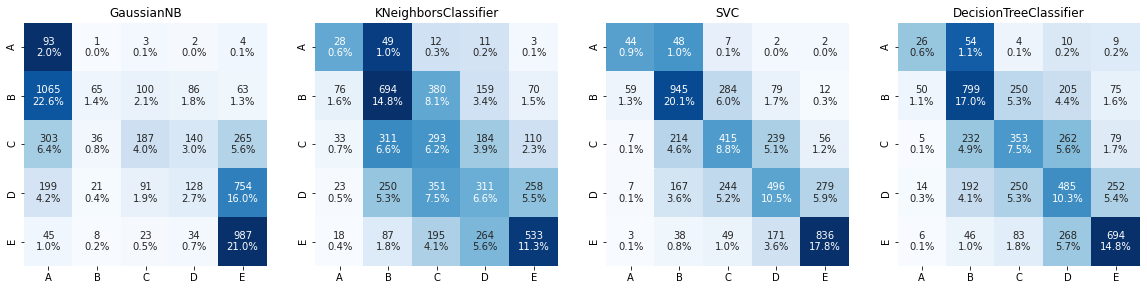

In [44]:
Fit_class(df_type,target_type,MLA,balancing='RandomOverSampler')

SVC yields the best performance with the best metrics overall, although the Decision Tree Classifier doesn't lag too far behind (after fine tunning, it might provide better results than SVC). Considering that the baseline accuracy if every donation type was attributed at random would be 20%, a 58% accuracy is already much better than what was obtained for the donor prediction in the previous section. Even so the results are not incredible. Looking at the confusion matrix, the first conclusion is that groups are confused more with their neighbouring groups, for example E is more confused with D than with every other group. This means that even if the model fails to classify correctly, it doesn't perform too badly either, because it classifies to a similar group. The main exception is that the groups B and D are misclassified as the other almost as much as with C, which lies in between them. Maybe it would be a good idea to construct these groups differently since there is so much overlap. Now, the models will be fine tuned.

#### Gridsearch for Donation Type

Only the best models will be fine-tuned, namely SVC and the Decision Tree Classifier

In [45]:
MLA = [

     #SVM
     svm.SVC(probability=True,max_iter=10000,decision_function_shape='ovr'),

     #Trees    
      tree.DecisionTreeClassifier(),
    ]

In [48]:
#WARNING: Running is very computational intensive and time expensive.


def GridSearch_donation_type(df, target, MLA , score = 'accuracy'):
    #df - X  
    #target - Y
    #MLA - List of Models to train
    #score - criteria to choose best set of hyperparameters

    grid_seed = [0]
    


    #IMPORTANT NOTE: the order of the parameters in grid_param has to match the order of the models in MLA
    grid_param = [
        
                 [{
                 #SVC 
                 'clf__kernel': [ 'poly', 'rbf'],
                 'clf__C': [0.5,1,10,100], 
                 'clf__gamma':[1,0.1,0.001],
                 'clf__random_state': grid_seed
                  }],
        
                
                  [
                  #DecisionTreeClassifier
                  {'clf__criterion': ['gini', 'entropy'], 
                  'clf__splitter': ['best', 'random'], 
                  'clf__max_depth': [2,4,6,8,10,None],
                  'clf__min_samples_split': [2,5,10,.03,.05],
                  'clf__min_samples_leaf': [1,5,10,.03,.05], 
                  'clf__max_features': [None, 'auto'],
                  'clf__random_state': grid_seed 
                 }]
                    
            ]

    MLA_columns = ['Model Name', 'Best Parameters','Mean Test Score','Fit Time']
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    
    row_index = 0
    
    cv_split = model_selection.StratifiedKFold(n_splits = 5, shuffle=True, random_state = 0 ) 

    start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
    
    print('Current Model:')
    for alg, param in zip (MLA, grid_param): #https://docs.python.org/3/library/functions.html#zip
        MLA_name = alg.__class__.__name__
        print(MLA_name)
        
        model = Pipeline([
        ('smote', RandomOverSampler(sampling_strategy='auto',random_state=0)),
        ('clf', alg)
        ],)
        
        
        
        start = time.perf_counter()        
        best_search = model_selection.GridSearchCV(estimator = model, param_grid = param[0], cv = cv_split, scoring = score,n_jobs=-1)
        best_search.fit(df, target)
        run = time.perf_counter() - start
        print('Time to gridsearch:',run)

        best_param = best_search.best_params_
        #print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(model.__class__.__name__, best_param, run))
        model.set_params(**best_param) 

        
        MLA_compare.loc[row_index, 'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Best Parameters'] = str(best_param)
        MLA_compare.loc[row_index, 'Fit Time'] = best_search.cv_results_['mean_fit_time'][best_search.best_index_]
        MLA_compare.loc[row_index, 'Mean Test Score'] = best_search.cv_results_['mean_test_score'][best_search.best_index_]
        row_index+=1



    run_total = time.perf_counter() - start_total


    print('Total optimization time was {:.2f} minutes.'.format(run_total/60))
    MLA_compare.sort_values(by = ['Mean Test Score'], ascending = False, inplace = True)
    return MLA_compare

In [49]:
results = GridSearch_donation_type(df_type,target_type, MLA , score = 'accuracy')
results

Current Model:
SVC


C:\Users\Aldina\anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Time to gridsearch: 1359.698517891
DecisionTreeClassifier
Time to gridsearch: 174.47430491100022
Total optimization time was 25.57 minutes.


,Model Name,Best Parameters,Mean Test Score,Fit Time
1,DecisionTreeClassifier,"{'clf__criterion': 'gini', 'clf__max_depth': 4...",0.61,0.12
0,SVC,"{'clf__C': 100, 'clf__gamma': 0.001, 'clf__ker...",0.59,26


In [50]:
results["Best Parameters"][0]

"{'clf__C': 100, 'clf__gamma': 0.001, 'clf__kernel': 'rbf', 'clf__random_state': 0}"

In [51]:
results["Best Parameters"][1]

"{'clf__criterion': 'gini', 'clf__max_depth': 4, 'clf__max_features': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.03, 'clf__random_state': 0, 'clf__splitter': 'best'}"

A note about the tuned parameters.

For the SVC it's hard to give a meaning to the results. The higher the C the greater the penalty for misclassification meaning the decision boundary will be less contoured. The same happens for low gamma. Low values of this parameter mean each point influences the decision boundary less. So the take-away is that this model performs better if it doesn't fit the data too much. This might be due to the fact that there is considerable overlap between the different categories (the results from this section and the previous one suggest that). In other words, if the data is poor, having very wiggly decision boundaries ends up being worse for the model.

For the tree model the max_depth for the tree is only 4, this is probably like this because if the tree was deeper it would overfit. There's not too much to read in the min_samples_leaf parameter specially given that with a depth of four, as will be shown further ahead, there aren't any leaves that only have a very small number of samples. It also makes sense that the 'best' splitter works better than the random.

Let's look at the confusion matrices of these models

In [52]:
MLA = [

     #SVM
     svm.SVC(probability=True,max_iter=10000,decision_function_shape='ovr',C=100,gamma=0.001, kernel='rbf',random_state=0),

     #Trees    
      tree.DecisionTreeClassifier(criterion ='gini',max_depth=4,max_features=None,min_samples_leaf=1,
                                  min_samples_split=0.03,random_state=0,splitter='best')
    ]

Classification Report for model: SVC
              precision    recall  f1-score   support

           A       0.24      0.54      0.34       103
           B       0.69      0.65      0.67      1379
           C       0.45      0.49      0.47       931
           D       0.53      0.46      0.49      1193
           E       0.74      0.76      0.75      1097

    accuracy                           0.59      4703
   macro avg       0.53      0.58      0.54      4703
weighted avg       0.60      0.59      0.60      4703

------------------------------------------------
Classification Report for model: DecisionTreeClassifier
              precision    recall  f1-score   support

           A       0.27      0.58      0.37       103
           B       0.70      0.62      0.66      1379
           C       0.44      0.60      0.51       931
           D       0.57      0.42      0.48      1193
           E       0.75      0.77      0.76      1097

    accuracy                           0.60

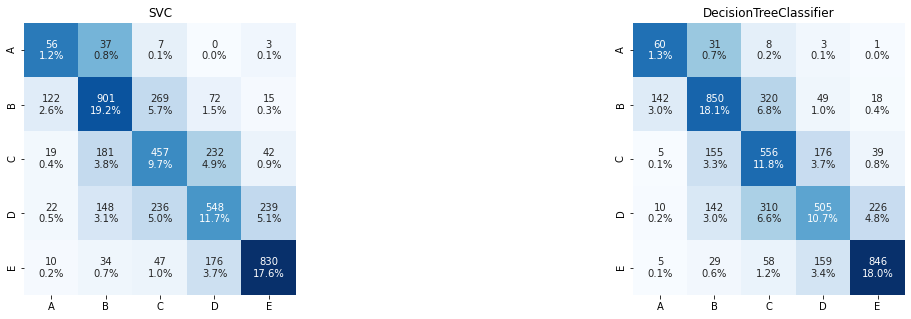

In [53]:
Fit_class(df_type,target_type, MLA, balancing = 'RandomOverSampler')

Let's check if the random oversampler still performs best:

Classification Report for model: SVC
              precision    recall  f1-score   support

           A       0.66      0.30      0.41       103
           B       0.65      0.77      0.71      1379
           C       0.46      0.36      0.40       931
           D       0.52      0.52      0.52      1193
           E       0.74      0.75      0.74      1097

    accuracy                           0.61      4703
   macro avg       0.61      0.54      0.56      4703
weighted avg       0.60      0.61      0.60      4703

------------------------------------------------
Classification Report for model: DecisionTreeClassifier
              precision    recall  f1-score   support

           A       0.58      0.52      0.55       103
           B       0.69      0.75      0.72      1379
           C       0.52      0.49      0.50       931
           D       0.55      0.56      0.55      1193
           E       0.79      0.73      0.76      1097

    accuracy                           0.64

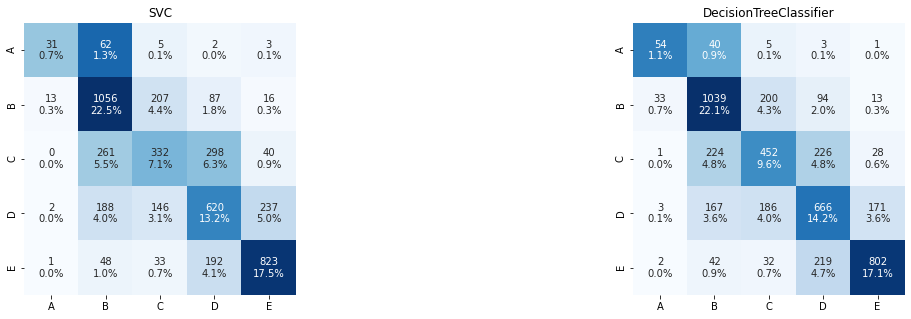

In [54]:
Fit_class(df_type,target_type, MLA, balancing = 'None')

No balancing is performing better with the set of fine tuned hyperparameters. One thing to note is that even if the accuracy only increased a a few percent with gridsearch, that doesn't show how much the model improved since in this iteration the confusion matrix is much more "diagonalized", meaning there are instances there are still misclassified, but they are misclassified closer to its true donation type. Depending on what these predictions will be used, this might be important aspect of the classification.

### 1.2.3 Feature Selection

Since now there is already a multi class and binary class problems that have been solved, it's a good time to do feature selection because the importance of variables on both problems can be compared. 

RFECV will be the method used for feature selection since it provides an automated way to estimate feature importance and works well with decision trees which are the best model for donation type classification. First, feature selection for donation type classification will be tested

In [55]:
#this set of preprocessing steps is the same that was used in the previous section and it's here for convenience

df_reset()

PROCESS_OUTLIERS = False
GAP_FILLING      = True
REMOVE_ERRORS    = True
PROCCESS_BINNING = True
uniform_binning  = False
ONE_HOT_ENCODING = True
PROCESS_SCALING  = True

if PROCESS_OUTLIERS:
    df = rm_outliers(df,columns_outlier_bin)

if GAP_FILLING:
    df= gap_fill(df)

if REMOVE_ERRORS:
    df = df[df.urbanicity !='?'].copy()
    df.reset_index(inplace=True,drop=True)

target = df.target_b.copy()
target_type = df.target_d.copy()
df.drop(["target_d","target_b"],axis=1,inplace=True)

if PROCCESS_BINNING:
    df = Bin_all(df, uniform_binning,nbins_q=4)

if ONE_HOT_ENCODING:
    df,target = one_hot_encode(df)

if PROCESS_SCALING:
    df = process_scaling(df,columns_norm)

#the new target variable target_type and dataframe,df_type are treated and filtered here.
target_type = pd.cut(target_type.dropna(),[-0.1,10,13,20,50,210],right=False,labels = ['E','D','C','B','A'])
df_type = df.iloc[target_type.index,:].copy()
target_type = target_type.reset_index(drop=True)
df_type.reset_index(inplace=True,drop=True)

Normalizing. Number of columns normalized:  29
Scaling. Number of columns scaled:  42


Now the feature selection per se

In [56]:
from sklearn.feature_selection import RFECV

In [57]:
#this function returns a RFECV fitted object
def Feature_selection(df_type,target_type):
    
    cv_split = model_selection.RepeatedStratifiedKFold(n_splits = 10, n_repeats=5, random_state = 0 ) 
    
    #we use the following model
    alg = tree.DecisionTreeClassifier(criterion ='gini',max_depth=4,max_features=None,min_samples_leaf=1,
                                  min_samples_split=0.03,random_state=0,splitter='best')
    
    feature_selector = RFECV(alg, cv = 5, scoring='accuracy',n_jobs=-1,)
    
    feature_selector.fit(df_type,target_type)
    
    feature_importance = pd.DataFrame(data={'col_name':df_type.columns,'ranking':feature_selector.ranking_}).sort_values('ranking')
    
    return feature_importance
    

In [58]:
feature_importance = Feature_selection(df_type,target_type)
print("------------------------------------------")
print("Results of Feature importance estimations:")
feature_importance

------------------------------------------
Results of Feature importance estimations:


,col_name,ranking
5,file_card_gift,1
6,frequency_status_97nk,1
35,recent_avg_gift_amt,1
9,last_gift_amt,1
13,lifetime_gift_count,2
41,ses,3
40,recent_star_status,4
39,recent_response_prop,5
38,recent_response_count,6
37,recent_card_response_prop,7


Surprinsigly there seem to be only a few relevant variables for classification with these hyperparameters. In fact, after testing if including variables with ranking higher than 1 benifited either the decision tree or the SVC model, it was concluded that up to a certain number of variables the performance of the model is the same as only using the rank 1 columns. After that, adding more variables hurts both models. Optimal performance can then be achieved when no balancing is done, a decision tree is used and only rank 1 variables are used:

In [59]:
def get_important_cols(feature_importance, ranking = 1):
    #returns columns that have ranking less or equal than "ranking"
    return feature_importance['col_name'][feature_importance['ranking']<=ranking]   

In [60]:
important_cols= get_important_cols(feature_importance, ranking = 1)
important_cols

5            file_card_gift
6     frequency_status_97nk
35      recent_avg_gift_amt
9             last_gift_amt
Name: col_name, dtype: object

Classification Report for model: SVC
              precision    recall  f1-score   support

           A       0.75      0.12      0.20       103
           B       0.68      0.76      0.71      1379
           C       0.48      0.37      0.42       931
           D       0.52      0.56      0.54      1193
           E       0.75      0.77      0.76      1097

    accuracy                           0.62      4703
   macro avg       0.64      0.52      0.53      4703
weighted avg       0.62      0.62      0.61      4703

------------------------------------------------
Classification Report for model: DecisionTreeClassifier
              precision    recall  f1-score   support

           A       0.58      0.52      0.55       103
           B       0.69      0.75      0.72      1379
           C       0.52      0.49      0.50       931
           D       0.55      0.56      0.55      1193
           E       0.79      0.73      0.76      1097

    accuracy                           0.64

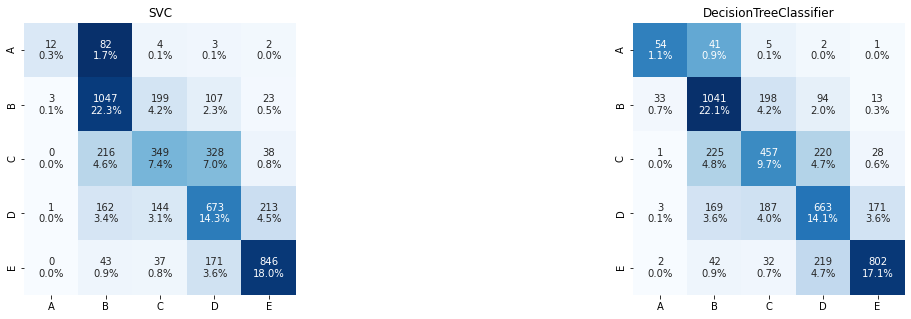

In [61]:
Fit_class(df_type[important_cols],target_type, MLA, balancing = 'None')

Also, after fiddling with the preprocessing stages, a new set of preprocessing steps yielded slgithly better results

In [62]:
df_reset()

PROCESS_OUTLIERS = False
GAP_FILLING      = True
REMOVE_ERRORS    = True
PROCCESS_BINNING = False
uniform_binning  = False
ONE_HOT_ENCODING = True
PROCESS_SCALING  = False

if PROCESS_OUTLIERS:
    df = rm_outliers(df,columns_outlier_bin)

if GAP_FILLING:
    df= gap_fill(df)

if REMOVE_ERRORS:
    df = df[df.urbanicity !='?'].copy()
    df.reset_index(inplace=True,drop=True)

target = df.target_b.copy()
target_type = df.target_d.copy()
df.drop(["target_d","target_b"],axis=1,inplace=True)

if PROCCESS_BINNING:
    df = Bin_all(df, uniform_binning,nbins_q=4)

if ONE_HOT_ENCODING:
    df,target = one_hot_encode(df)

if PROCESS_SCALING:
    df = process_scaling(df,columns_norm)

target_type = pd.cut(target_type.dropna(),[-0.1,10,13,20,50,210],right=False,labels = ['E','D','C','B','A'])
df_type = df.iloc[target_type.index,:].copy()
target_type = target_type.reset_index(drop=True)
df_type.reset_index(inplace=True,drop=True)

Classification Report for model: SVC
              precision    recall  f1-score   support

           A       0.63      0.38      0.47       103
           B       0.72      0.71      0.72      1379
           C       0.51      0.61      0.56       931
           D       0.57      0.57      0.57      1193
           E       0.81      0.70      0.75      1097

    accuracy                           0.65      4703
   macro avg       0.65      0.60      0.61      4703
weighted avg       0.66      0.65      0.65      4703

------------------------------------------------
Classification Report for model: DecisionTreeClassifier
              precision    recall  f1-score   support

           A       0.56      0.48      0.51       103
           B       0.73      0.70      0.72      1379
           C       0.51      0.58      0.54       931
           D       0.61      0.53      0.57      1193
           E       0.75      0.80      0.78      1097

    accuracy                           0.65

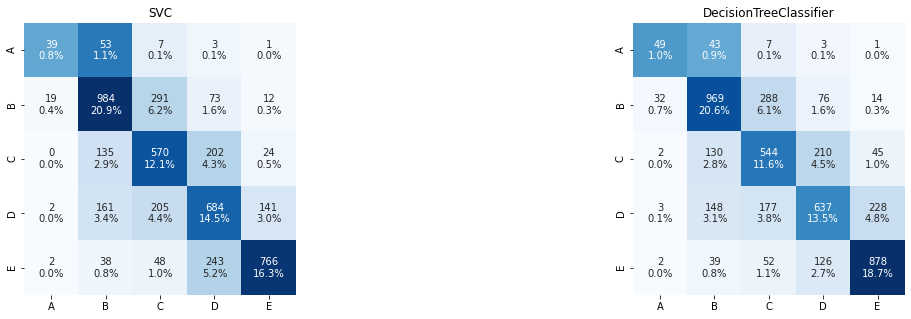

In [63]:
Fit_class(df_type[important_cols],target_type, MLA, balancing = 'None')

Given that only 4 variables are important Some insight might be gained about the classification by visualizing the Decision Tree model

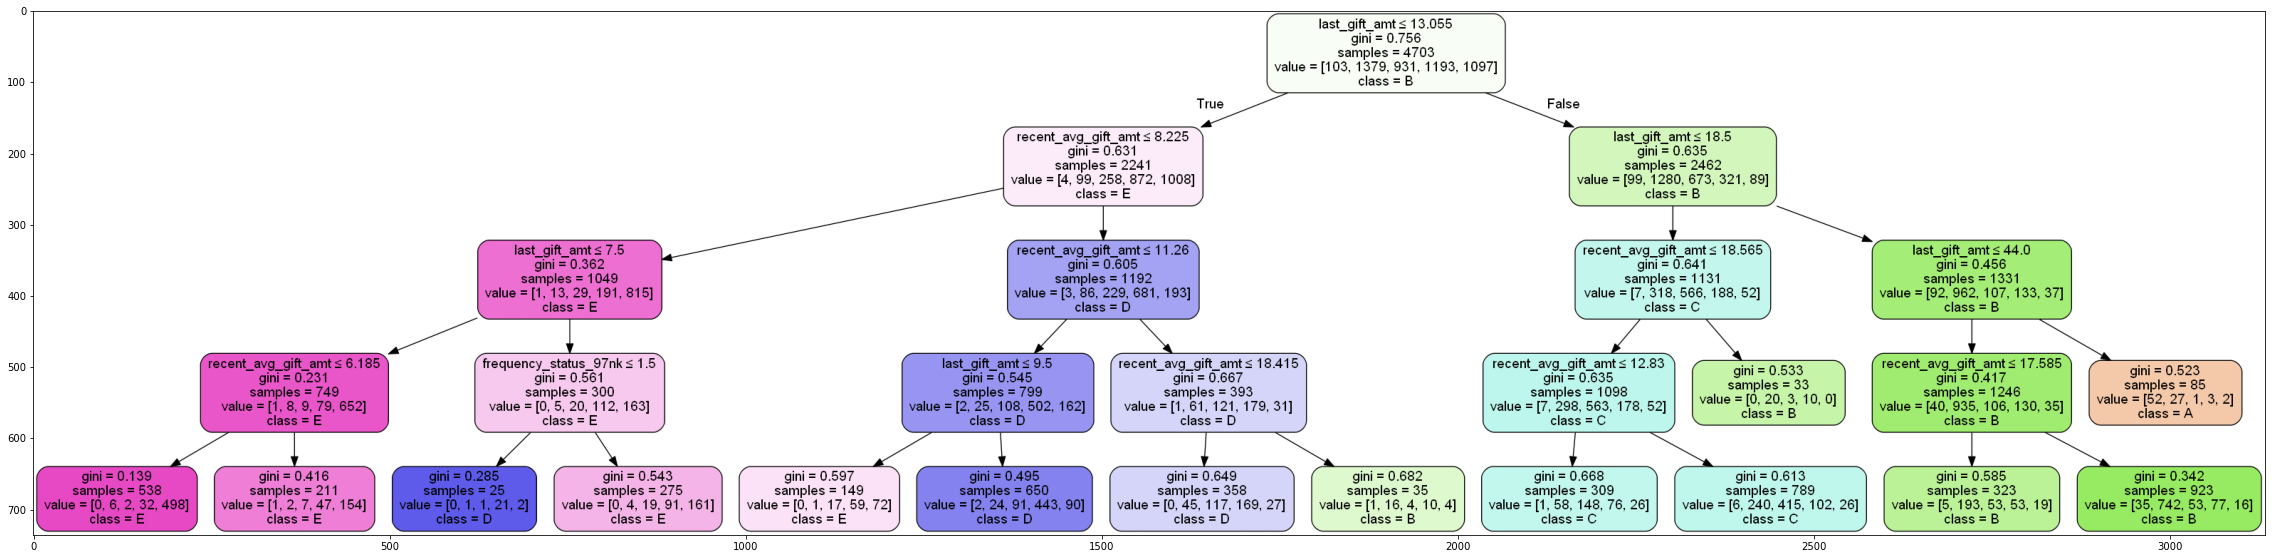

In [64]:
important_cols= get_important_cols(feature_importance, ranking = 1)


alg = tree.DecisionTreeClassifier(criterion ='gini',max_depth=4,max_features=None,min_samples_leaf=1,
                                  min_samples_split=0.03,random_state=0,splitter='best')
alg.fit(df_type[important_cols],target_type)

#generate .dot file
dot_data = tree.export_graphviz(alg, out_file="donation_type_tree.dot",
                                feature_names=df_type[important_cols].columns,
                                class_names=['A','B','C','D','E'],
                                filled=True, rounded=True,
                                special_characters=True)
#transform file to png format
from subprocess import call
call(['dot', '-T', 'png', 'donation_type_tree.dot', '-o', 'donation_type_tree.png'],shell=True)

#visualize Tree
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('donation_type_tree.png')
plt.figure(figsize = (40,40))
imgplot = plt.imshow(img)

Even though it's too small to see here, by looking at the generated tree, it can be seen that intuitively the criteria used by the tree makes sense, for example, its main splitting criteria seems to be recent_avg_gift_amt and last_gift_amt. It makes sense that people that have donated more recently on average are also likely to donate more.
Also looking at the first split for example, by looking at the 'value' entry, it can be observed that this split effectively seperates the dataset in two parts of roughly the same size. The one on the left is skewed towards type 'E' and the one on the right is skewed towards type 'A', so that's the sort of Decision the tree learns well.

It should also be noted that the selected variables are the one that have higher correlation with target_d as was seen in the data exploration part of this report.

It might be a good idea to redo gridsearch after feature selection and the new preprecessing. Note that the important variables were chosen based on a Decision Tree that had a specific hyperparametrization. Since adding a few variables with less importance doesn't hurt the performance of the model it's a good idea to add them before redoing gridsearch because other columns might be important for other models or other parametrizations. The 7 most important variables were chosen, and gridsearch was repeated

In [65]:
important_cols= get_important_cols(feature_importance, ranking = 7)

In [66]:
MLA = [
      #SVM
      svm.SVC(max_iter=5000,decision_function_shape='ovr'),

      #Trees    
       tree.DecisionTreeClassifier(),
    ]

In [67]:
results = GridSearch_donation_type(df_type,target_type, MLA , score = 'accuracy')
results

Current Model:
SVC


C:\Users\Aldina\anaconda3\envs\py37\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Time to gridsearch: 220.31795777099978
DecisionTreeClassifier
Time to gridsearch: 228.58043016099964
Total optimization time was 7.48 minutes.


,Model Name,Best Parameters,Mean Test Score,Fit Time
1,DecisionTreeClassifier,"{'clf__criterion': 'gini', 'clf__max_depth': 4...",0.63,0.16
0,SVC,"{'clf__C': 1, 'clf__gamma': 0.001, 'clf__kerne...",0.29,11


The results with GridSearch did not improve

#### Feature Selection for Donor prediction

We follow the same approach for the donors prediction

In [68]:
df_reset()

PROCESS_OUTLIERS = True
GAP_FILLING      = True
REMOVE_ERRORS    = True
PROCCESS_BINNING = True
uniform_binning  = False
ONE_HOT_ENCODING = True
PROCESS_SCALING  = True

if PROCESS_OUTLIERS:
    df = rm_outliers(df,columns_outlier_bin)

if GAP_FILLING:
    df= gap_fill(df)

if REMOVE_ERRORS:
    df = df[df.urbanicity !='?'].copy()
    df.reset_index(inplace=True,drop=True)

target = df.target_b.copy()
target_type = df.target_d.copy()
df.drop(["target_d","target_b"],axis=1,inplace=True)

if PROCCESS_BINNING:
    df = Bin_all(df, uniform_binning,nbins_q=8)

if ONE_HOT_ENCODING:
    df,target = one_hot_encode(df)

if PROCESS_SCALING:
    df = process_scaling(df,columns_norm)


Normalizing. Number of columns normalized:  29
Scaling. Number of columns scaled:  42


In [69]:
feature_importance = Feature_selection(df,target)
print("------------------------------------------")
print("Results of Feature importance estimations:")
feature_importance

------------------------------------------
Results of Feature importance estimations:


,col_name,ranking
6,frequency_status_97nk,1
13,lifetime_gift_count,2
31,pep_star,3
25,number_prom_12,4
9,last_gift_amt,5
5,file_card_gift,6
1,card_prom_12,7
18,median_home_value,8
14,lifetime_gift_range,9
35,recent_avg_gift_amt,10


All of the columns selected for donation type are also important for donor prediction, but now there are some extra important columns. However the Decision Tree is not the best model for this problem, so let's see what happens when only these columns are used for Naie-Bayes classifier and Decision Tree

In [70]:
important_cols_donors= get_important_cols(feature_importance, ranking = 1)
important_cols_donors

6    frequency_status_97nk
Name: col_name, dtype: object

In [71]:
MLA = [       
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Trees    
    tree.DecisionTreeClassifier()
    ]

,Model Name,Parameters,Mean Accuracy,Mean F1,Mean Precision,Mean Recall,Fit Time
1,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.57,0.38,0.3,0.54,0.028
0,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.64,0.36,0.33,0.41,0.032


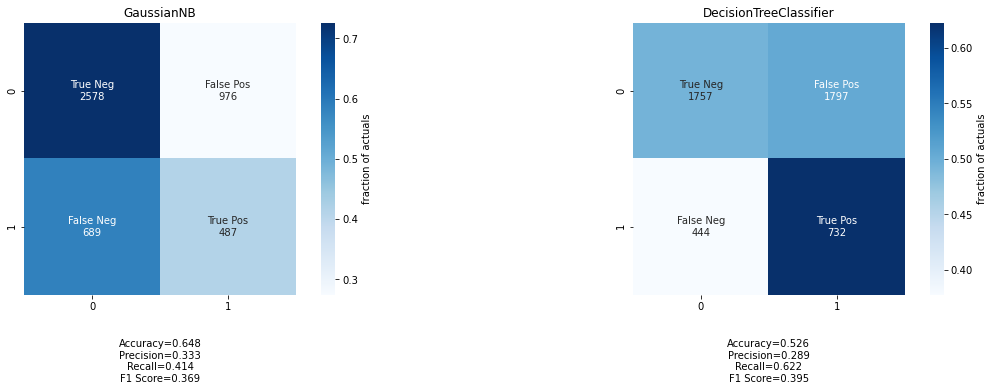

In [72]:
Fit_donor(df[important_cols_donors],target, MLA)

To compare easily, let's see the results without feature selection

,Model Name,Parameters,Mean Accuracy,Mean F1,Mean Precision,Mean Recall,Fit Time
0,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.58,0.41,0.31,0.58,0.23
1,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.64,0.29,0.28,0.3,1.1


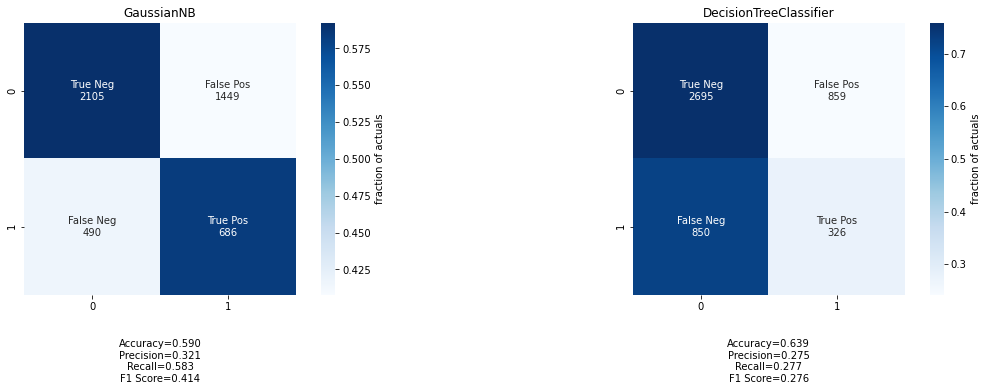

In [73]:
Fit_donor(df,target, MLA)

There is a 1 percent decrease in  f1 score performance when only using the important columns, so this is not a factor in performance, with the exception of reducing computation times and simplifying the problem itself. Tests were made including variables with ranking higher than 1 but the performance never increased past the 0.41 f1 score.

## 1.2.4 Classification for SES

In this section, the prediction of donor type and donor are made for each SES group respectivly. 

The same set of preprocessing steps that were made before are repeated here with the difference that now the '?' values will be considered a SES category so those entries will not be removed.  Also, the SES column is removed from the training set as it is redundant.

In [74]:
df_reset()

PROCESS_OUTLIERS = True
GAP_FILLING      = True
REMOVE_ERRORS    = False
PROCCESS_BINNING = True
uniform_binning  = False
ONE_HOT_ENCODING = True
PROCESS_SCALING  = True

if PROCESS_OUTLIERS:
    df = rm_outliers(df,columns_outlier_bin)

if GAP_FILLING:
    df= gap_fill(df)

if REMOVE_ERRORS:
    df = df[df.urbanicity !='?'].copy()
    df.reset_index(inplace=True,drop=True)

target = df.target_b.copy()
target_type = df.target_d.copy()
df.drop(["target_d","target_b"],axis=1,inplace=True)

if PROCCESS_BINNING:
    df = Bin_all(df, uniform_binning)

if ONE_HOT_ENCODING:
    df,target = one_hot_encode(df)
    
ses = df.ses.copy()    
df.drop(["ses"],axis=1,inplace=True)

if PROCESS_SCALING:
    df = process_scaling(df,columns_norm)

Normalizing. Number of columns normalized:  29
Scaling. Number of columns scaled:  42


Different training datasets and targets need to defined for each category. A function was made with that in mind.

In [75]:
#creates a list with the dataframes for the different ses values. 
#the '?' ses value corresponds to the 0 position in the list
def create_ses_datasets(df,target,ses):
    ses_values = sorted(ses.unique())
    dataframes =[]
    targets = []
    for value in ses_values:
        dataframes.append(df[ses==value])
    for value in ses_values:
        targets.append(target[ses==value])
    return [dataframes,targets]
    

In [76]:
ses_dfs, ses_targets = create_ses_datasets(df,target,ses)

Check of how many examples are there in each SES category (remember that '?' is the 0 category)

In [77]:
ses.value_counts().sort_index()

0     454
1    5924
2    9284
3    3323
4     387
Name: ses, dtype: int64

Feature selection was tried but it did not yield good results, hence it will be skiped

In [78]:
#FEATURE SELECTION
# important_cols = get_important_cols(feature_importance, ranking = 1)
# for i in range(len(ses_dfs)):
#     ses_dfs[i] = ses_dfs[i][important_cols]

Now, fitting the models

In [79]:
MLA = [       
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    
    #Trees    
    tree.DecisionTreeClassifier(), 
    ]

In [80]:
ses_values = sorted(ses.unique())
for i in range(len(ses_dfs)):
    if i ==0:
        print('Results for Ses type:','?')
    else:
        print('Results for Ses type:',ses_values[i])
    display(Fit_donor(ses_dfs[i],ses_targets[i],MLA,draw_confusion_matrix=False))
    print('---------------------------------------------\n\n')

Results for Ses type: ?


,Model Name,Parameters,Mean Accuracy,Mean F1,Mean Precision,Mean Recall,Fit Time
2,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.63,0.5,0.43,0.6,0.2
0,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.33,0.47,0.31,0.99,0.025
1,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.57,0.43,0.37,0.52,0.037
3,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.59,0.35,0.35,0.35,0.035


---------------------------------------------


Results for Ses type: 1


,Model Name,Parameters,Mean Accuracy,Mean F1,Mean Precision,Mean Recall,Fit Time
0,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.57,0.4,0.32,0.55,0.08
2,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.6,0.37,0.32,0.44,91
1,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.54,0.35,0.28,0.47,0.46
3,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.61,0.29,0.28,0.29,0.27


---------------------------------------------


Results for Ses type: 2


,Model Name,Parameters,Mean Accuracy,Mean F1,Mean Precision,Mean Recall,Fit Time
0,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.58,0.41,0.31,0.57,0.11
2,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.63,0.39,0.33,0.47,2.2e+02
1,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.55,0.34,0.27,0.47,0.82
3,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.65,0.3,0.3,0.3,0.45


---------------------------------------------


Results for Ses type: 3


,Model Name,Parameters,Mean Accuracy,Mean F1,Mean Precision,Mean Recall,Fit Time
0,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.57,0.38,0.28,0.61,0.049
2,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.63,0.33,0.28,0.41,24
1,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.56,0.31,0.24,0.45,0.26
3,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.67,0.23,0.23,0.23,0.14


---------------------------------------------


Results for Ses type: 4


,Model Name,Parameters,Mean Accuracy,Mean F1,Mean Precision,Mean Recall,Fit Time
0,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.26,0.29,0.17,0.84,0.022
1,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.54,0.26,0.2,0.44,0.038
2,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.66,0.22,0.19,0.27,0.19
3,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.73,0.21,0.23,0.2,0.031


---------------------------------------------




Interestingly the datapoints corresponding to the '?' SES type were the only ones yielding improved performance. In the data exploration section, it was observed that these points indeed follow a particular distribution of features that differs from the main dataset. This might mean that these data points were collected differently so they are more reliable, or might mean that they correspond to a particular group of the population that is more specific than the groups formed by other SES values. In turn that makes it easier for the model to learn the characteristics of those particular points. Another interesting point to note is that this was the only instance in which a model outperformed the GaussiNB algorithm, namely the SVC. That is also a tell that there is something inherently different about this datapoints.

The results for groups 1,2,3 don't differ much from the results obtained in the previous sections. The results for group 4 are quite bad when comparing with everything else. With only 387 samples, there probably isn't enough data in this category to make meaningfull predicitons.

#### SES Classification for Donation Type

The preprocessing steps are also tweaked for the intended purpose, but much of the process is repeated.

In [81]:
df_reset()

PROCESS_OUTLIERS = False
GAP_FILLING      = True
REMOVE_ERRORS    = False
PROCCESS_BINNING = False
uniform_binning  = False
ONE_HOT_ENCODING = True
PROCESS_SCALING  = False

if PROCESS_OUTLIERS:
    df = rm_outliers(df,columns_outlier_bin)

if GAP_FILLING:
    df= gap_fill(df)

if REMOVE_ERRORS:
    df = df[df.urbanicity !='?'].copy()
    df.reset_index(inplace=True,drop=True)

target = df.target_b.copy()
target_type = df.target_d.copy()
df.drop(["target_d","target_b"],axis=1,inplace=True)

if PROCCESS_BINNING:
    df = Bin_all(df, uniform_binning,nbins_q=4)

if ONE_HOT_ENCODING:
    df,target = one_hot_encode(df)
    
ses = df.ses.copy()    
df.drop(["ses"],axis=1,inplace=True)

if PROCESS_SCALING:
    df = process_scaling(df,columns_norm)

target_type = pd.cut(target_type.dropna(),[-0.1,10,13,20,50,210],right=False,labels = ['E','D','C','B','A'])
df_type = df.iloc[target_type.index,:].copy()
target_type = target_type.reset_index(drop=True)
df_type.reset_index(inplace=True,drop=True)

In [82]:
ses_dfs_type, ses_targets_type = create_ses_datasets(df_type,target_type,ses)

C:\Users\Aldina\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Aldina\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Aldina\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Aldina\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Aldina\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Now feature selection is performed

In [83]:
feature_importance = Feature_selection(df_type,target_type)
important_cols = get_important_cols(feature_importance, ranking = 1)
for i in range(len(ses_dfs_type)):
    ses_dfs_type[i] = ses_dfs_type[i][important_cols]

Now fitting the models

In [84]:
MLA = [       
    #Navies Bayes
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    #best parameters from gridsearch
    svm.SVC(probability=True,max_iter=10000,C=100,gamma=0.001),
    
    #Trees    
    tree.DecisionTreeClassifier(criterion ='gini',max_depth=4,max_features=None,min_samples_leaf=1,
                                  min_samples_split=0.03,random_state=0,splitter='best'), 
    ]

Now fitting the models

In [85]:
ses_values = sorted(ses.unique())
results_summary = pd.DataFrame(columns=['Model name', 'Accuracy','F1 Macro avg','F1 Weighted avg','Total data points'])

for i in range(len(ses_dfs_type)):
    if i ==0:
        print('Results for Ses type:','?')
    else:
        print('Results for Ses type:',ses_values[i])
    results_detailed = Fit_class(ses_dfs_type[i],ses_targets_type[i],MLA,draw_confusion_matrix=False,balancing='None',display_report=False)
    row_index = 0
    for model_name in results_detailed.keys():
        results_summary.loc[row_index, 'Model name'] = model_name
        results_summary.loc[row_index, 'Accuracy'] = results_detailed[model_name]['accuracy']
        results_summary.loc[row_index, 'F1 Macro avg'] = results_detailed[model_name]['macro avg']['f1-score']
        results_summary.loc[row_index, 'F1 Weighted avg'] = results_detailed[model_name]['weighted avg']['f1-score']
        results_summary.loc[row_index, 'Total data points'] = results_detailed[model_name]['macro avg']['support']
        
        row_index+=1
        
    display(results_summary.sort_values(by='Accuracy',ascending=False))
    


Results for Ses type: ?


C:\Users\Aldina\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Aldina\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Aldina\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Aldina\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


,Model name,Accuracy,F1 Macro avg,F1 Weighted avg,Total data points
2,SVC,0.55,0.43,0.54,186
1,KNeighborsClassifier,0.53,0.5,0.52,186
3,DecisionTreeClassifier,0.53,0.51,0.51,186
0,GaussianNB,0.47,0.39,0.43,186


Results for Ses type: 1


,Model name,Accuracy,F1 Macro avg,F1 Weighted avg,Total data points
3,DecisionTreeClassifier,0.66,0.64,0.65,1395
2,SVC,0.65,0.61,0.65,1395
1,KNeighborsClassifier,0.64,0.61,0.64,1395
0,GaussianNB,0.59,0.6,0.59,1395


Results for Ses type: 2


,Model name,Accuracy,F1 Macro avg,F1 Weighted avg,Total data points
2,SVC,0.66,0.63,0.66,2385
3,DecisionTreeClassifier,0.65,0.64,0.65,2385
1,KNeighborsClassifier,0.62,0.61,0.62,2385
0,GaussianNB,0.59,0.57,0.58,2385


Results for Ses type: 3


,Model name,Accuracy,F1 Macro avg,F1 Weighted avg,Total data points
2,SVC,0.64,0.57,0.64,806
3,DecisionTreeClassifier,0.63,0.56,0.63,806
1,KNeighborsClassifier,0.59,0.49,0.59,806
0,GaussianNB,0.57,0.53,0.56,806


Results for Ses type: 4


C:\Users\Aldina\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Aldina\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Aldina\anaconda3\envs\py37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aldina\anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_grou

,Model name,Accuracy,F1 Macro avg,F1 Weighted avg,Total data points
2,SVC,0.59,0.54,0.6,71
1,KNeighborsClassifier,0.56,0.45,0.55,71
0,GaussianNB,0.52,0.43,0.52,71
3,DecisionTreeClassifier,0.51,0.47,0.51,71


First it should be noted that there are severall warnings raised because the data is insuficient to train the models. In fact, removing the non donors and then splitting the donors into 5 categories makes it so that there is too little data to train decent models particularly for the SES type 4 and '?' which have lower cardinality than the rest. For SES values of 1,2,3 the model performance is not too different than when training the whole dataset but it's still worse.

In summary, there is not enough data to make thorough conclusions about this part of the training.
Another point that perhaps is worth making is that KNN and SVC perform particularly bad comparing with Decision Trees and Naive-Bayes when there is not a large sample size.

## Classification - Results and Discussion 

Since supervised learning is an iterative process, much of the discussion has already been made. In this section the results are summed up.

Before going into detail about the results of every task, some words should be said about the project in generall. Overall, the tasks were performed succefully, and the use of sofisticated techniques like SMOTE and recursive feature elimination complemented the baseline goal quite well. Even so, there is still room for improvement. For starters, models that are out of the scope of this course could be tried. Secondly and on a more technical note, the preprocessing stage and the fitting function that were built each deserved their own object class. Unfortunatly there wasn't enough time to implement this feature which would made the code not only more readable but also more functional in a OOB programming context. Finally, it should be noted that no decisions were made based on domain expertise. In a real life example, asking for help to interpret the variables from a domain expert would probably be a good way forward.

### Donor Classification Results

On this task the algorithm that performed best was the GaussianNB with an average cross validated **f1 score of 0.41**. The confusion matrix for this part of the problem is the following:

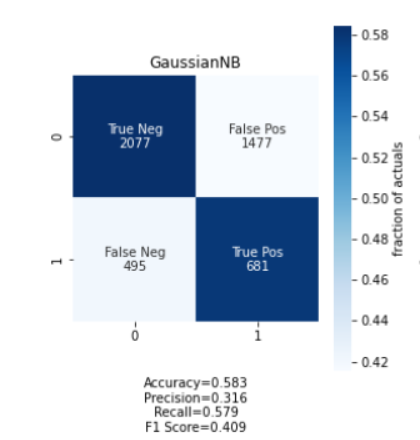

If there is a reason why this is the winning algorithm it is a bit unclear. Usually Naive-Bayes performs well on high dimensional data but even with feature selection it kept outperforming other algorithms.

### Donor Type Classification Results

For this problem, the Decision Tree Classifier and the SVC both performed very well, achieving an **accuracy of 65%**. The classification reports for those tasks are the following:

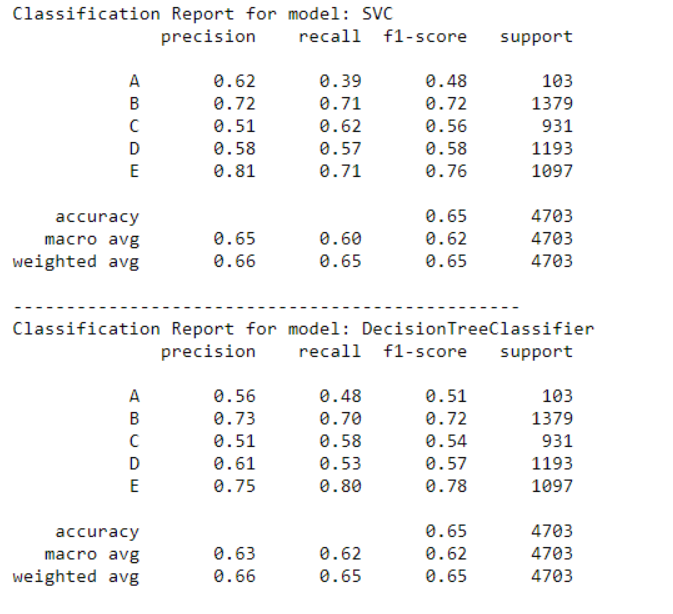

And the confusion matrices:

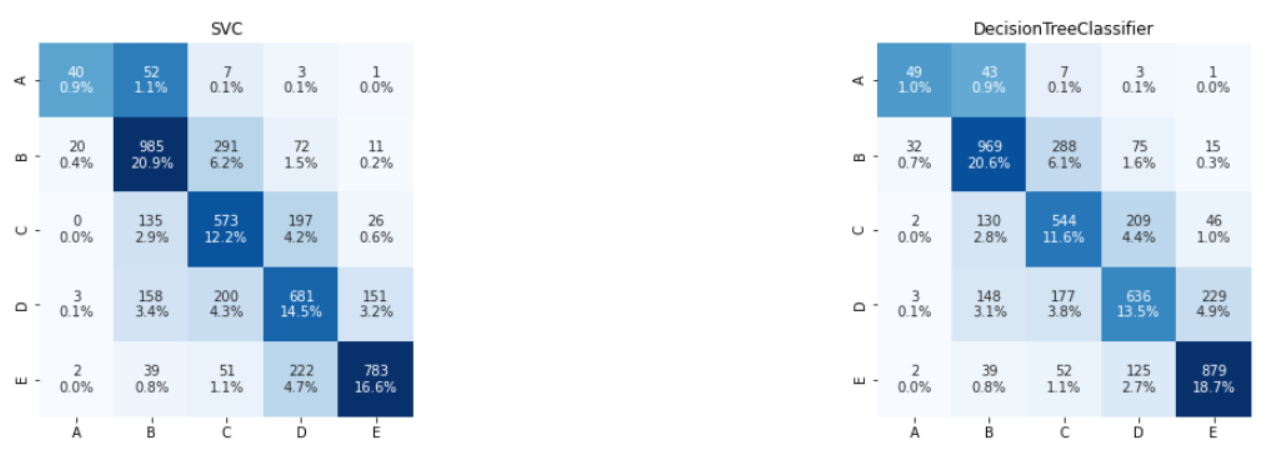

This section is where the best results were achieved. Once again it's not easy to guess why these two models signficantly outperform the rest. Decision trees handle imbalanced data very well, so that might be a big reason why it performed so well. The decision tree also provides the advantage that it's much faster to train and easily interpretable, comparing to SVC. 

### Classification for SES types

#### Donor Classification

The initial goal in this task was to investigate if by subsetting the data to particular socioeconomic type the algorithms could learn more efficiently when a person will be a donor. The results were mixed. For SES types 1,2,3 the overall behaviour and performance of the models did not change considerably relative to when the whole dataset is used. 

For the SES type '?' the f1-score increased to 0.5, supporting the evidence found in data exploration that these points behave differently from the rest of the dataset. The reasons why that might be so were already explained, but there are no certainties as to what exactly makes this data different.

Finally, for SES type 4 the f1-score performance decreased to 0.29. Most likely this is not a indicative that te data in this subset is worse. Instead it is probably due to the fact that there are fewer samples for this SES type, so the quality of the models decreases.

#### Donor Type Classification

The results in this section were extremly poor for the SES types that have very few samples, specially considering that the exclusion of non-donors already makes the dataset pretty small. However for the SES types that have a significant number of samples the performance was only marginally smaller than when using the whole dataset clocking in at 62% accuracy. Even so, no new insight was gained from performing this task except for the fact that a sizable dataset is needed to train a good model, and if there is a multiclass problem at hand that factor comes into play even more.